# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [3]:
# verificar o tipo de dado de cada coluna
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [4]:
# criar uma função para verificar valores nulos e o percentual de valores nulos em cada coluna
def nulos_percentual(df):
    nulos = df.isnull().sum()
    percentual = (nulos / len(df)) * 100
    return pd.DataFrame({'nulos': nulos, 'percentual': percentual})

# execultar a função e printar o resultado
nulos = nulos_percentual(df)

print(nulos)

                    nulos  percentual
Age                    34   20.731707
Gender                  0    0.000000
Income                  0    0.000000
Education               0    0.000000
Marital Status          0    0.000000
Number of Children      0    0.000000
Home Ownership          0    0.000000
Credit Score            0    0.000000


In [5]:
# preencher os valores nulos da coluna 'Age' com a média dos valores da coluna 'Age' e converter para inteiro
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].astype(int)


# execultar a função denovo para verificar se ainda existem valores nulos
nulos = nulos_percentual(df)
print(nulos)

                    nulos  percentual
Age                     0         0.0
Gender                  0         0.0
Income                  0         0.0
Education               0         0.0
Marital Status          0         0.0
Number of Children      0         0.0
Home Ownership          0         0.0
Credit Score            0         0.0


In [6]:
# Converter demais colunas para o tipo correto
df['Credit Score'] = df['Credit Score'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['Number of Children'] = df['Number of Children'].astype(int)
df['Education'] = df['Education'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Home Ownership'] = df['Home Ownership'].astype('category')

# Verificar os tipos de dados novamente
print(df.dtypes)


Age                      int64
Gender                category
Income                  object
Education             category
Marital Status        category
Number of Children       int64
Home Ownership        category
Credit Score          category
dtype: object


In [7]:
# Tratar a coluna 'Income' para o tipo float
df['Income'] = df['Income'].str.replace('.', '', regex=False)  # tira separador de milhar
df['Income'] = df['Income'].str.replace(',', '.', regex=False)  # troca vírgula por ponto
df['Income'] = df['Income'].astype(float)


In [8]:
# verificar valores unicos nas colunas categóricas
print(df['Credit Score'].unique())
print(df['Marital Status'].unique())
print(df['Education'].unique()) 
print(df['Gender'].unique())
print(df['Home Ownership'].unique())

# padronizar os valores das colunas e deixar todos os dados em maiúsculo
df['Credit Score'] = df['Credit Score'].str.upper().str.strip()
df['Marital Status'] = df['Marital Status'].str.upper().str.strip()
df['Education'] = df['Education'].str.upper().str.strip()
df['Gender'] = df['Gender'].str.upper().str.strip()
df['Home Ownership'] = df['Home Ownership'].str.upper().str.strip()


# verificar valores unicos nas colunas categóricas
print("\nValores únicos após padronização:\n\n")
print(df['Credit Score'].unique())
print(df['Marital Status'].unique())
print(df['Education'].unique()) 
print(df['Gender'].unique())
print(df['Home Ownership'].unique())


['High', 'Average', 'Low']
Categories (3, object): ['Average', 'High', 'Low']
['Single', 'Married']
Categories (2, object): ['Married', 'Single']
['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['Rented', 'Owned']
Categories (2, object): ['Owned', 'Rented']

Valores únicos após padronização:


['HIGH' 'AVERAGE' 'LOW']
['SINGLE' 'MARRIED']
["BACHELOR'S DEGREE" "MASTER'S DEGREE" 'DOCTORATE' 'HIGH SCHOOL DIPLOMA'
 "ASSOCIATE'S DEGREE"]
['FEMALE' 'MALE']
['RENTED' 'OWNED']


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [9]:
# meu processo segue uma ordem um pouco diferente. Primeiro verifico a qualidade dos dados,
# checo o tipo de cada variável e se existem valores faltantes ou digitados de forma errada.
#depois faço a limpeza e a transformação dos dados, convertendo os tipos de dados
# para o formato correto e preenchendo os valores nulos.
# Somente depois dessa etapa eu passo a analisar a presença de outliers.
# A partir daí, sigo com a análise univariada e, em seguida, com a análise bivariada.
# Já iniciei esse fluxo, mas acabo seguindo a minha linha de raciocínio própria,
# então os demais passos acabam vindo em sequência desse processo.

# é tipo eu faço na ordem que para mim faz mais sentido, sabe?
# porque se não dá retrabalho, tipo, se eu for fazer a análise e depois perceber que
# tem um monte de valor nulo ou que tá no formato errado, o codigo não vai rodar direito vai dar aviso
# e eu tenho que refazer, então eu prefiro já fazer a limpeza e transformação antes de começar a tratar.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [10]:
#Já fiz acima

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [11]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [12]:
# criar função iqr para detectar outliers
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_filtrado

def remove_outliers_apply(grupo):
    Q1 = grupo.quantile(0.25)
    Q3 = grupo.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return grupo[(grupo >= limite_inferior) & (grupo <= limite_superior)]

# remover outliers nas colunas 'Age', 'Income'
df = remover_outliers_iqr(df, 'Age')
df = remover_outliers_iqr(df, 'Income')


df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.402439,83765.243902,0.652439
std,7.564625,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,31.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,43.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [13]:
(df['Number of Children'] == 0).sum()

np.int64(97)

In [14]:
(df['Number of Children'] == 0).mean() * 100

np.float64(59.14634146341463)

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [15]:
#verificar a distribuição da variável target 'Credit Score'
contagem = df['Credit Score'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

print(f'O numero de itens é:\n\n{contagem}\n\n')
print(f'A porcentagem é:\n\n{porcentagem}\n\n')

O numero de itens é:

Credit Score
HIGH       113
AVERAGE     36
LOW         15
Name: count, dtype: int64


A porcentagem é:

Credit Score
HIGH       68.902439
AVERAGE    21.951220
LOW         9.146341
Name: count, dtype: float64




In [16]:

# Criar o gráfico de barras
fig = px.bar(
    x=porcentagem.index,           # Valores únicos do Credit Score
    y=porcentagem.values,          # Frequências
    title='Distribuição do Credit Score',
    labels={'x': 'Credit Score', 'y': 'Frequência'},
    text=porcentagem.round(2),   # Texto com porcentagem
    color=porcentagem.values,        # Cor das barras baseada na frequência

)

# Formatando o texto das barras
fig.update_traces(
    texttemplate='%{text}%',    # Adiciona o símbolo %
    textposition='inside'      # Coloca o texto dentro das barras
)

# Ajustes finais no layout
fig.update_layout(
    showlegend=False,
    yaxis_title="Frequência",
    xaxis_title="Credit Score"
)

fig.show()




podemos ver que os dados de não estão balanceados e que nossa base tem apenas 9,15% de pessoas com score baixo o que pode dificultar o aprendizado do modelo

podemos ver tambem que a maior parte dos individos tem um score alto 

In [17]:
# criar variaveis de porcentagem e contagem para a coluna 'Gender'
genero_contagem = df['Gender'].value_counts()
genero_porcentagem = (genero_contagem / genero_contagem.sum()) * 100

#printar os resultados
print(f'O numero de itens é:\n\n{genero_contagem}\n\n')
print(f'A porcentagem é:\n\n{genero_porcentagem}\n\n')

# criar o gráfico de barras para a coluna 'Gender'
df_gender = df['Gender'].value_counts(normalize=True).reset_index()
df_gender.columns = ['Gender', 'Percent']
df_gender['Percent'] *= 100

# Gráfico de pizza
fig = px.pie(
    df_gender,
    names='Gender',
    values='Percent',
    title='Distribuição Percentual das Faixas de Gênero',
    color='Gender',
    hole=0.4
)

fig.show()

O numero de itens é:

Gender
FEMALE    86
MALE      78
Name: count, dtype: int64


A porcentagem é:

Gender
FEMALE    52.439024
MALE      47.560976
Name: count, dtype: float64




a categoria genero está bem semelhante perto de estarem balanceadas

In [18]:
#criar variaveis de porcentagem e contagem para a coluna 'Education'
education_contagem = df['Education'].value_counts()
education_porcentagem = (education_contagem / education_contagem.sum()) * 100

#printar os resultados
print(f'O numero de itens é:\n\n{education_contagem}\n\n')
print(f'A porcentagem é:\n\n{education_porcentagem}\n\n')

# criar o gráfico de barras para a coluna 'Education'
fig = px.bar(
    education_porcentagem,
    x=education_porcentagem.index,
    y=education_porcentagem.values,
    title='Distribuição de Nível de Educação',
    labels={'x':'Nível de Educação', 'y':'Frequência (%)'},
    color=education_porcentagem.index,
    text=education_porcentagem.round(2),   # Texto com porcentagem

)
# Formatando o texto das barras
fig.update_traces(
    texttemplate='%{text}%',    # Adiciona o símbolo %
    textposition='inside'      # Coloca o texto dentro das barras
)

# Ajustes finais no layout
fig.update_layout(
    showlegend=False,
    yaxis_title="Frequência",
    xaxis_title="Nível de Educação"
)
fig.show()


O numero de itens é:

Education
BACHELOR'S DEGREE      42
MASTER'S DEGREE        36
DOCTORATE              31
HIGH SCHOOL DIPLOMA    30
ASSOCIATE'S DEGREE     25
Name: count, dtype: int64


A porcentagem é:

Education
BACHELOR'S DEGREE      25.609756
MASTER'S DEGREE        21.951220
DOCTORATE              18.902439
HIGH SCHOOL DIPLOMA    18.292683
ASSOCIATE'S DEGREE     15.243902
Name: count, dtype: float64




In [19]:
# Contagem e percentual de cada faixa de score
df_score = df['Credit Score'].value_counts(normalize=True).reset_index()
df_score.columns = ['Credit Score', 'Percent']
df_score['Percent'] *= 100

# Gráfico de pizza
fig = px.pie(
    df_score,
    names='Credit Score',
    values='Percent',
    title='Distribuição Percentual das Faixas de Score de Crédito',
    color='Credit Score',
    hole=0.4
)

fig.show()

a variavel principal('Credit Score') está estremamente desbalanceada

a distribuição da variavel educação está bem semelhante

In [20]:
#verificar outliers na coluna Income
income = df['Income']

fig = px.box(
    income,
    y=income,
    title='Distribuição de Renda (Income)',
    labels={'y':'Renda (Income)'},
)
fig.show()

In [21]:
home_ownership = df['Home Ownership'].value_counts()
home_ownership_porcentagem = (home_ownership / home_ownership.sum()) * 100
print(home_ownership_porcentagem)
fig = px.bar(
    home_ownership_porcentagem,
    x=home_ownership_porcentagem.index,
    y=home_ownership_porcentagem.values,
    title='Distribuição de Tipo de Moradia',
    labels={'x':'Tipo de Moradia', 'y':'Frequência (%)'},
    color=home_ownership_porcentagem.index,
    text=home_ownership_porcentagem.round(2),   # Texto com porcentagem
)
# Formatando o texto das barras
fig.update_traces(
    texttemplate='%{text}%',    # Adiciona o símbolo %
    textposition='inside'      # Coloca o texto dentro das barras
)

# Ajustes finais no layout
fig.update_layout(
    showlegend=False,
    yaxis_title="Frequência",
    xaxis_title="Tipo de Moradia"
)
fig.show()


Home Ownership
OWNED     67.682927
RENTED    32.317073
Name: count, dtype: float64


a maioria da distribuição estão consentrada em owend ou seja a maioria das pessoas dos nossos dados tem imoveis

In [22]:
marital_status = df['Marital Status'].value_counts()
marital_status_porcentagem = (marital_status / marital_status.sum()) * 100
print(marital_status_porcentagem)
fig = px.bar(
    marital_status_porcentagem,
    x=marital_status_porcentagem.index,
    y=marital_status_porcentagem.values,
    title='Distribuição de Estado Civil',
    labels={'x':'Estado Civil', 'y':'Frequência (%)'},
    color=marital_status_porcentagem.values
)
fig.show()


Marital Status
MARRIED    53.04878
SINGLE     46.95122
Name: count, dtype: float64


o estado civil está em proporçoes semelhantes o que é bom para o modelo

In [23]:
#analise univariada para numero de filhos
number_of_children_contagem = df['Number of Children'].value_counts()
number_of_children_porcentagem = (number_of_children_contagem / number_of_children_contagem.sum()) * 100
print(f'O numero de itens é:\n\n{number_of_children_contagem}\n\n')
print(f'A porcentagem de itens é:\n\n{number_of_children_porcentagem}\n\n')


fig = px.bar(
    number_of_children_porcentagem,
    x=number_of_children_porcentagem.index,
    y=number_of_children_porcentagem.values,
    title='Distribuição do Número de Filhos',
    labels={'x':'Número de Filhos', 'y':'Frequência (%)'},
    color=number_of_children_porcentagem.values
)
fig.show()

O numero de itens é:

Number of Children
0    97
1    32
2    30
3     5
Name: count, dtype: int64


A porcentagem de itens é:

Number of Children
0    59.146341
1    19.512195
2    18.292683
3     3.048780
Name: count, dtype: float64




a maior parte das pessoas desse data frame não tem filhos 

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [24]:
#após analise univariada, podemos ver que a maioria dos individuos tem um score alto
#e a distribuição da variavel educação está bem semelhante
#e que apesar de 3% das pessoas terem 3 filhos não podemos simplismente considerar isso um outlier
#porque é muito pequeno e não faria sentido excluir esses dados.


**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O idade parece influenciar no salário?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [25]:
# #analise bivariada
# Agrupar por 'Marital Status' e calcular a mediana da 'Age'
estado_civil_idade = df.groupby('Marital Status')['Age'].median().reset_index()

# Criar o gráfico de barras
fig = px.bar(estado_civil_idade, x="Marital Status", y="Age", color="Marital Status",
             title="Distribuição da Idade por Status Civil",
             labels={"Marital Status": "Status Civil", "Age": "Idade"})
fig.show()

In [26]:
#criar gráfico boxplot para analisar a distribuição da idade por estado civil
fig = px.box(df, x='Marital Status', y='Age', color='Marital Status',
             title='Distribuição da Idade por Status Civil')
fig.update_layout(yaxis_title='Idade', xaxis_title='Status Civil')
fig.show()

podemos ver nesse grafico com mais claresa que os os dados dos casados tem 
maior variabilidade, tambem podemos ver que o Q3 dos solteiros é muito proximo do q1 dos casados e que tem o exato valor corespondente a mediana dos casados o que dá para se supor e que as pessoas tendem a se casar mais por volta dos 37 anos. 

podemos ver uma assimetria possitiva nos casados já que a mediana se aproxima muito do Q1, e uma provavel distribuição simetrica nos Solteiros já que a o Q2 está mais o menos no centro dos demais quartis , o bigode superior está um pouco mais alto mais isso não afeta tanto a distribuição normal 

ou seja idades mas altas estão mais relacionadas com pessoas casadas e idades mais baixas estão relacionadas a pessoas solteiras



In [27]:
#agrupar as variaveis 'Credit Score' e 'Education' para analisar a relação entre elas
df3 = df.groupby('Education')['Credit Score'].value_counts(normalize=True).reset_index(name='proportion')

# criar o gráfico de barras agrupadas
fig = px.bar(df3, x='Education', y='proportion', color='Credit Score', barmode='group',
             title='Distribuição do Credit Score por Nível de Educação',
             labels={'Education': 'Nível de Educação', 'proportion': 'Proporção', 'Credit Score': 'Credit Score'})
fig.show()

Podemos observar que, conforme o nível de educação aumenta, o score também aumenta. Além disso, mais de 95% das pessoas com pós-graduação possuem um score alto em comparação com aquelas que não têm pós-graduação. Podemos inferir, portanto, que, à medida que o nível de educação aumenta, a renda também tende a aumentar e, consequentemente, o nível de score também se eleva.

In [28]:
#agrupar 'Age' por 'Income' para analisar a relação entre elas
df4 = df.groupby('Age')['Income'].median().reset_index()

# criar o gráfico de dispersão
fig = px.scatter(df4, x='Age', y='Income',
                 title='Relação entre Idade e Renda',
                 labels={'Age': 'Idade', 'Income': 'Renda'},
                 color='Income')
fig.show()

podemos ver nesse grafico que existe uma relação positiva entre idade e renda, ou seja, conforme a idade aumenta, a renda também tende a aumentar.
mas a relação não é perfeita e a variaçoes entre os individos mais isso nao desvalida a relação possitiva

o salario não influencia na idade mas a idade influencia no salario

In [29]:
#agrupar 'Income' com score
df5 = df.groupby('Credit Score')['Income'].median().reset_index()

# criar o gráfico de dispersão
fig = px.bar(df5,x='Credit Score', y='Income', color='Credit Score',
             title='Distribuição da Renda por Credit Score')
fig.show()

Como já pevisto anteriormente por mim, salários mais altos influencian diretamente no score, ou sejá é uma co-relação positiva já que quando o salario sobe o score tambem sobe e quanto menor o salario menor o score

In [30]:
#Analise Bivaria da pergunta - pessoas com imoveis tem o score mais alto?
#agrupar as variaveis 'Credit Score' e 'Home Ownership' para analisar a relação entre elas
df6 = df.groupby('Home Ownership')['Credit Score'].value_counts(normalize=True).reset_index(name='proportion')

# criar o gráfico de barras agrupadas
fig = px.bar(df6, x='Home Ownership', y='proportion', color='Credit Score', barmode='stack',
             title='Distribuição do Credit Score por Tipo de Moradia',
             labels={'Home Ownership': 'Tipo de Moradia', 
                     'proportion': 'Proporção', 
                     'Credit Score': 'Credit Score'})
fig.show()

 com base no grafico podemos constatar que pessoas que possuem imoves tendem a ter um score mais alto , e que pessoas que não possuem imovens tendem a ter scores mais baixos, podemos constatar que:

* 98,19% das pessoas com imoveis tem score Alto e nem 1% possui score baixo 
* 92,46% das pessoas que não tem imoveis tem score Medio Baixo

**Possivel insight**

podemos concluir que pessoas com uma estabilidade financeira 
tendem a ter um score consideravelmente maior que pessoas que 
são financeiramente instáveis

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

* 1 - Pessoas do sexo masculino tendem a ter um score mais alto?
* 2 - o numero de filhos influencia no score?
* 3 - o nivel de educação realmente influencia o salario?
* 4 - o estado civil influencia no numero de filhos?
* 5 - qual a relação entre o estado civil e o nivel de educação?

In [31]:
# cria série com proporções e nomeia a coluna corretamente
df7 = (
    df.groupby('Credit Score')['Gender']
      .value_counts(normalize=True)
      .rename('proportion')        # nomeia o resultado
      .reset_index()   
               # transforma em DataFrame
)  

# criar o gráfico de barras agrupadas
fig = px.bar(
    df7,
    x='Credit Score',
    y='proportion',               # <- importante
    color='Gender',
    title='Proporção de gêneros por Credit Score',
    barmode='group',
    labels={'Credit Score': 'Credit Score', 'proportion': 'Proporção', 'Gender': 'Gênero'}
)

fig.show()


entre os clientes com score baixo(LOW), há uma concentração exclusivamente feminina. essa categoria representa apenas cerca de 9% da amostra total, o que indca que essa discrepância pode ser resultado de um efeito amostra localizado, e não de um padrão estatisticamente relevante.

nas faixas de score medio (AVERAGE) e score alto (HIGH), as proporções entre homens e mulheres se mantêm relativamente equilibradas, com leve predominância masculina nas pontuações médias.

portanto, embora o gráfico indique que os homens tendem a apresentar scores moderadamente mais altos, essa diferença não é robusta o suficiente para sustentar qualquer conclusão sobre o impacto do gênero no comportamento de crédito.

acredito que será nescesario a remoção dessa coluna uma vez que a adição dela pode gerar vies no modelo

In [32]:
# Cria df com contagens e nomeia a coluna de contagem
df8 = (
    df.groupby(['Credit Score', 'Number of Children'])
      .size()
      .reset_index(name='Count')
)

# Normaliza a contagem dentro de cada Credit Score (para porcentagem)
df8['Percent'] = (
    df8.groupby('Credit Score')['Count']
        .transform(lambda x: x / x.sum() * 100)
)

# Gráfico: eixo Y = percentual
fig = px.bar(
    df8,
    x='Number of Children',
    y='Percent',
    color='Credit Score',
    title='Distribuição do Número de Filhos por Faixa de Credit Score',
    labels={
        'Credit Score': 'Credit Score',
        'Number of Children': 'Número de Filhos',
        'Percent': 'Percentual (%)'
    }
)

fig.update_layout(barmode='group')  # barras lado a lado por score
fig.show()


100% das pessoas com score baixo e 94,44% das pessoas com score medio não tem filhos, modemois inferir que o fato de 100% das pessoas com score baixo não terem filhos pode ser um efeito amostra já que apenas 9% dos nossos dados são de pessoas com score baixo

In [33]:
#criar grafico para analisar a relação de salario e nivel de educação
#agrupar 'Income' por 'Education' para analisar a relação entre elas
df9 = df.groupby('Education')['Income'].median().reset_index()
fig = px.bar(df9, x='Education', y='Income', color='Education',
             title='Relação entre Nível de Educação e Renda',
             labels={'Education': 'Nível de Educação', 'Income': 'Renda'})
fig.show()

podemos ver que conforme o nivel de estudo aumenta o salario tambem tende a aumentar proporcionalmente

In [34]:
# Análise bivariada entre 'Marital Status' e 'Number of Children'
df10 = (
    df.groupby(['Marital Status', 'Number of Children'])
      .size()
      .reset_index(name='Count')
)

df10['Percent'] = (
    df10.groupby('Marital Status')['Count']
        .transform(lambda x: x / x.sum() * 100)
)

fig = px.bar(
    df10,
    x='Number of Children',
    y='Percent',
    color='Marital Status',
    title='Distribuição do Número de Filhos por Estado Civil',
    labels={
        'Marital Status': 'Estado Civil',
        'Number of Children': 'Número de Filhos',
        'Percent': 'Percentual (%)'
    }
)
fig.update_layout(barmode='group')  # barras lado a lado por estado civil
fig.show()

podemos ver que 100% das pessoas solteiras de nosso data frame não tem filhos, portanto sim o estado civil influencia diretamente no numeros de filhos

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

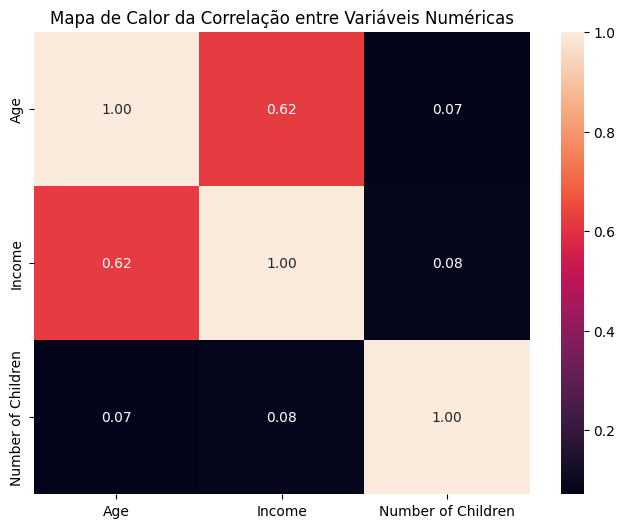

In [35]:
df.select_dtypes(include=['number']).corr()
correlação_heartmap = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlação_heartmap, annot=True,fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

dá para ver uma co-relação alta entre idade e salario e faz total sentido porque quanto maior a idade mais esperiencia a pessoa possui portanto tende a receber mais

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [36]:
#Converter variaves categoricas em numerica label encoding de forma manual

map = {'LOW': 0, 'AVERAGE': 1, 'HIGH': 2}
df['Credit Score value'] = df['Credit Score'].map(map)

map_education = {
    "HIGH SCHOOL DIPLOMA": 0,
    "ASSOCIATE'S DEGREE": 1,
    "BACHELOR'S DEGREE": 2,
    "MASTER'S DEGREE": 3,
    "DOCTORATE": 4
}

df['Education value'] = df['Education'].map(map_education)


#converter variaveis categoricas one-hot encoding
df = pd.get_dummies(df, columns=['Marital Status', 'Gender', 'Home Ownership'], drop_first=True)
print(df.to_string())



     Age    Income            Education  Number of Children Credit Score  Credit Score value  Education value  Marital Status_SINGLE  Gender_MALE  Home Ownership_RENTED
0     25   50000.0    BACHELOR'S DEGREE                   0         HIGH                   2                2                   True        False                   True
1     30  100000.0      MASTER'S DEGREE                   2         HIGH                   2                3                  False         True                  False
2     35   75000.0            DOCTORATE                   1         HIGH                   2                4                  False        False                  False
3     40  125000.0  HIGH SCHOOL DIPLOMA                   0         HIGH                   2                0                   True         True                  False
4     45  100000.0    BACHELOR'S DEGREE                   3         HIGH                   2                2                  False        False          

In [37]:
df.dtypes

Age                        int64
Income                   float64
Education                 object
Number of Children         int64
Credit Score              object
Credit Score value         int64
Education value            int64
Marital Status_SINGLE       bool
Gender_MALE                 bool
Home Ownership_RENTED       bool
dtype: object

In [38]:
for column in df.columns:
    if df[column].dtype.name == 'bool':
        df[column] = df[column].astype(int)
print(df.to_string())

     Age    Income            Education  Number of Children Credit Score  Credit Score value  Education value  Marital Status_SINGLE  Gender_MALE  Home Ownership_RENTED
0     25   50000.0    BACHELOR'S DEGREE                   0         HIGH                   2                2                      1            0                      1
1     30  100000.0      MASTER'S DEGREE                   2         HIGH                   2                3                      0            1                      0
2     35   75000.0            DOCTORATE                   1         HIGH                   2                4                      0            0                      0
3     40  125000.0  HIGH SCHOOL DIPLOMA                   0         HIGH                   2                0                      1            1                      0
4     45  100000.0    BACHELOR'S DEGREE                   3         HIGH                   2                2                      0            0          

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [39]:
# Seleciona apenas as colunas numéricas
df_num = df.select_dtypes(include=['number'])

# Calcula a correlação entre elas
corr = df_num.corr()

# Exibe a matriz de correlação
print(corr.to_string())



                            Age    Income  Number of Children  Credit Score value  Education value  Marital Status_SINGLE  Gender_MALE  Home Ownership_RENTED
Age                    1.000000  0.621599            0.071556            0.574759         0.179216              -0.451982     0.204980              -0.633305
Income                 0.621599  1.000000            0.084547            0.744407         0.253858              -0.471004     0.495738              -0.704928
Number of Children     0.071556  0.084547            1.000000            0.426280         0.317956              -0.696984    -0.442139              -0.497129
Credit Score value     0.574759  0.744407            0.426280            1.000000         0.538476              -0.619854     0.194962              -0.854970
Education value        0.179216  0.253858            0.317956            0.538476         1.000000              -0.341955    -0.082355              -0.490329
Marital Status_SINGLE -0.451982 -0.471004           

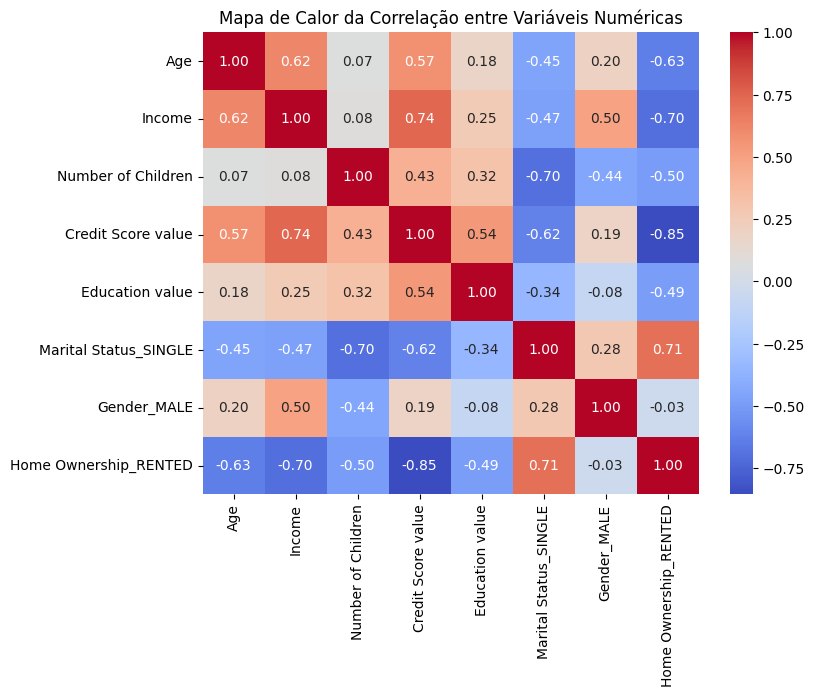

In [40]:
df.select_dtypes(include=['number']).corr()
correlação_heartmap = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlação_heartmap, cmap='coolwarm', annot=True,fmt=".2f")
plt.title('Mapa de Calor da Correlação entre Variáveis Numéricas')
plt.show()


Como eu já tinha visto na análise bivariada, as pessoas com maior estabilidade social e financeira tendem a ter um score de crédito mais alto.
E esse gráfico confirma exatamente isso. Dá para ver uma forte correlação positiva entre o Credit Score e algumas variáveis, como:

* Renda (0.74)

* Idade (0.57)

* Número de Filhos (0.43)

* Nível de Educação (0.54)

Esses números mostram um padrão bem claro: quanto maior a renda, idade, escolaridade e responsabilidade familiar, maior tende a ser o score de crédito, o que representa um sinal de estabilidade financeira.

Agora, olhando para o outro lado, temos as correlações negativas, que também contam uma boa parte da história:

Estado Civil (SINGLE): pessoas solteiras tendem a ter score mais baixo, enquanto as casadas geralmente têm score mais alto.

Propriedade de Imóvel (RENTED): morar de aluguel tem uma correlação negativa bem forte com o score (-0.85), indicando que ter casa própria está ligado a uma condição financeira mais estável.

Outro ponto interessante é que o campo Home Ownership_RENTED tem correlação negativa com praticamente todas as variáveis, o que reforça a ideia de que morar de aluguel está associado a menor estabilidade econômica — com exceção do estado civil SINGLE, o que faz sentido, já que solteiros tendem mesmo a alugar mais.

Por fim, o gênero apresenta uma correlação moderada com a renda (0.50), mas não se mostrou uma variável relevante para o modelo, porque:

Não tem correlação significativa com o score;

E toda a amostra com score baixo é composta por mulheres, o que poderia gerar viés de gênero no modelo preditivo.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [41]:
dropar = ['Education', 'Credit Score', 'Gender_MALE']
df = df.drop(columns=dropar)

x = df.drop('Credit Score value', axis=1)
y = df['Credit Score value']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
x_train

,Age,Income,Number of Children,Education value,Marital Status_SINGLE,Home Ownership_RENTED
141,26,45000.0,0,1,1,1
117,29,27500.0,0,0,1,1
93,25,62500.0,0,2,1,1
133,29,68000.0,2,4,0,0
36,31,65000.0,0,2,1,1
...,...,...,...,...,...,...
71,46,97500.0,1,0,0,0
106,32,57500.0,0,1,1,1
14,37,70000.0,2,2,0,0
92,37,85000.0,1,4,0,0


In [44]:
y_train

141    1
117    0
93     1
133    1
36     1
      ..
71     2
106    1
14     2
92     2
102    2
Name: Credit Score value, Length: 123, dtype: int64

In [45]:
x_test.shape

(41, 6)

In [46]:
y_test.shape

(41,)

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

Conforme analise anterior já foi verificado que a coluna de credit score não está balanceada com a porcentagem da distribuição dessa forma

* **HIGH**   -       68.902439 %
* **AVERAGE** -    21.951220 %
* **LOW**    -        09.146341 %

In [47]:
# Contagem e percentual de cada faixa de score
df_score = df['Credit Score value'].value_counts(normalize=True).reset_index()
df_score.columns = ['Credit Score value', 'Percent']
df_score['Percent'] *= 100

# Gráfico de pizza
fig = px.pie(
    df_score,
    names='Credit Score value',
    values='Percent',
    title='Distribuição Percentual das Faixas de Score de Crédito',
    color='Credit Score value',
    hole=0.4
)

fig.show()

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [48]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

print('Distribuição de Classe apos o balanço')
print(y_train_balanced.value_counts())

Distribuição de Classe apos o balanço
Credit Score value
1    84
0    84
2    84
Name: count, dtype: int64


In [49]:
x_train_balanced.to_csv('x_train_balanced.csv',index=False)
y_train_balanced.to_csv('y_train_balanced.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)